In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = np.load("correctedFinalCoordsRandom7.npy")

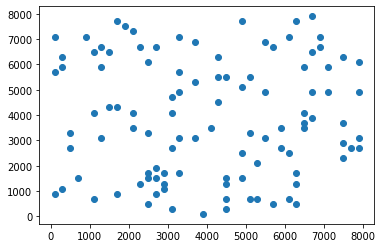

In [11]:
plt.scatter(df[:,0], df[:,1])

In [34]:
scaledX = (df[:,0]//200).astype(int)
scaledY = (df[:,1]//200).astype(int)

xRange = np.max(scaledX) - np.min(scaledX) + 1
yRange = np.max(scaledY) - np.min(scaledY) + 1
maxRange = np.max((xRange, yRange))

mask = np.zeros((maxRange, maxRange))

for x,y in zip(scaledX, scaledY):
    mask[x, y] = 1  

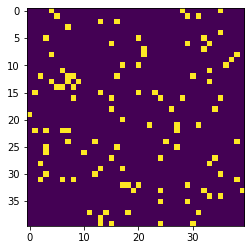

In [35]:
plt.imshow(mask)

In [105]:
def getLocalities(df, searchLen, normScalar):
    x = df[:, 0].astype(int) // normScalar
    y = df[:, 1].astype(int) // normScalar
    
    xRange = np.max(x) - np.min(x)
    yRange = np.max(y) - np.min(y)
    maxRange = np.max((xRange, yRange))
    
    normSearchLen = searchLen // normScalar
    
    maskDim =  maxRange + 4*normSearchLen
    mask = np.zeros((maskDim, maskDim))
    
    centroids = []
    rewards = []
    localities = []
    
    # draw 1 by 1 organoids on mask with padding
    for ix, coord in enumerate(zip(x, y)):
        cx = coord[0] + 2*normSearchLen
        cy = coord[1] + 2*normSearchLen
        centroids.append((cx,cy))
        mask[cx, cy] = 1
        
        rewards.append(df[:, -1][ix])

    # extract localities 
    for ix, c in enumerate(centroids):
        cx, cy = c[0], c[1]
        locality = mask[cx-normSearchLen: cx+normSearchLen+1, cy-normSearchLen: cy+normSearchLen+1]
        localities.append(np.append(locality.flatten(), rewards[ix]))
        
    return localities

In [106]:
localities = getLocalities(df, 1000, 200)

In [109]:
np.array(localities).shape

(105, 122)

In [91]:
np.hstack((localities, rewards))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [70]:
%matplotlib inline

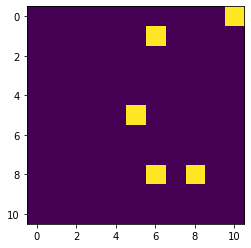

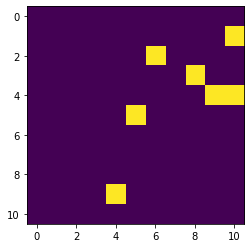

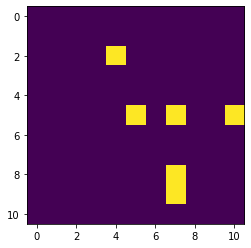

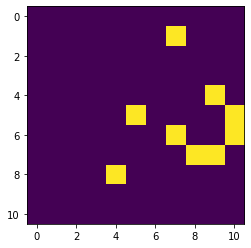

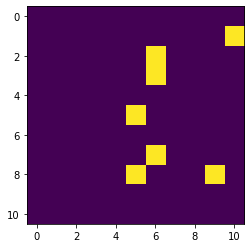

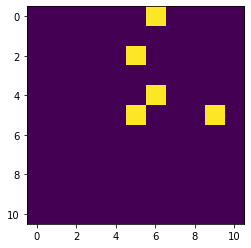

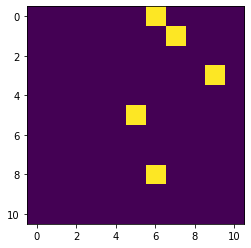

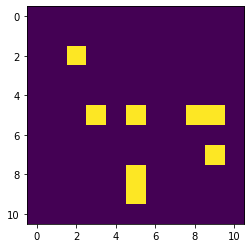

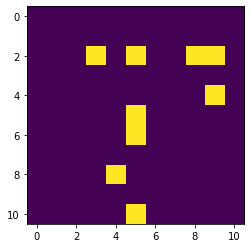

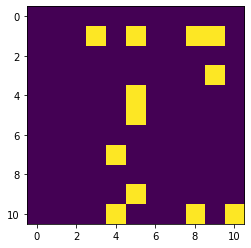

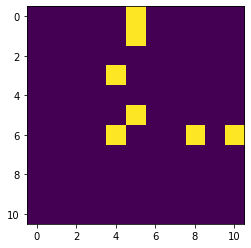

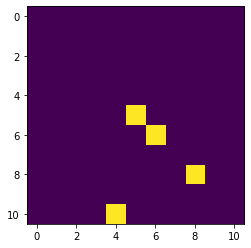

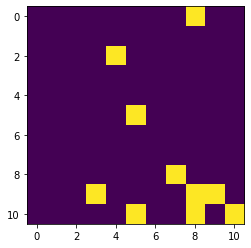

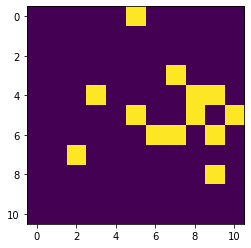

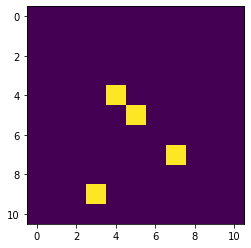

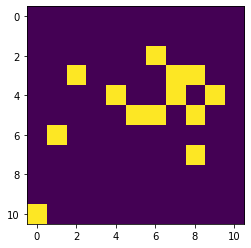

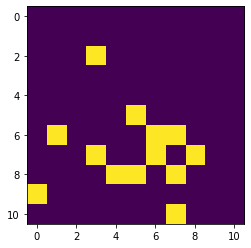

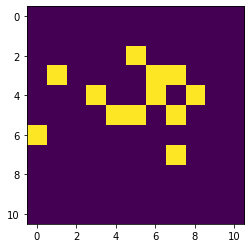

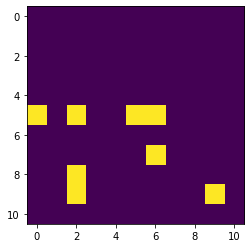

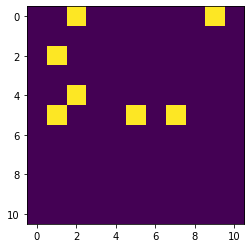

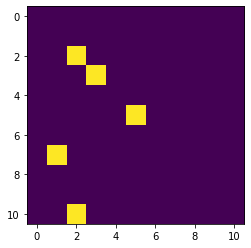

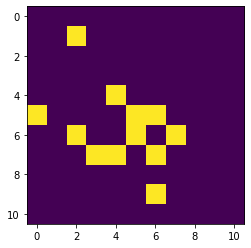

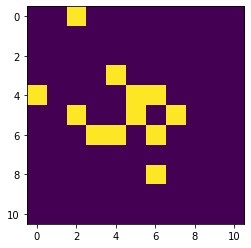

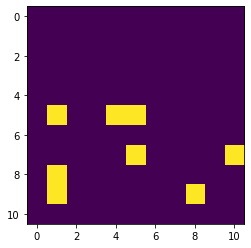

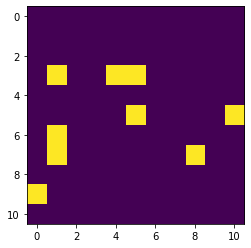

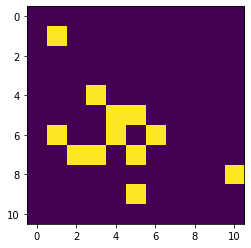

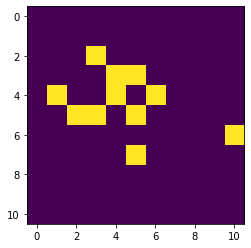

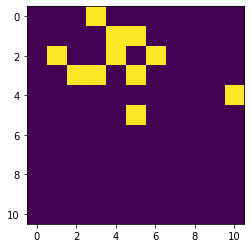

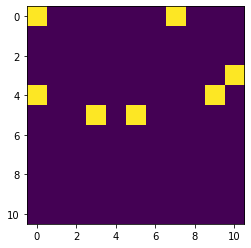

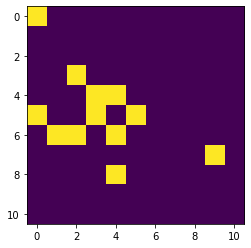

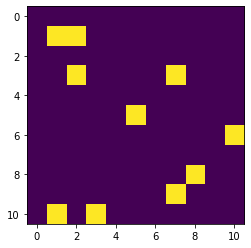

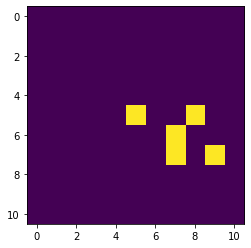

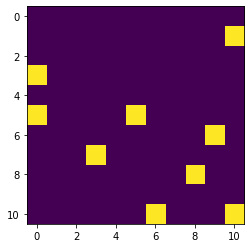

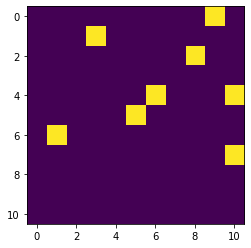

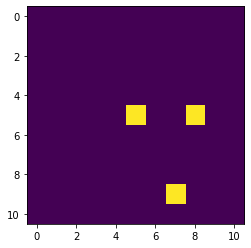

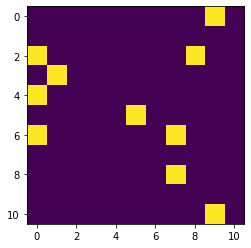

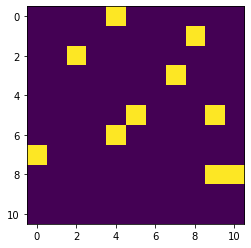

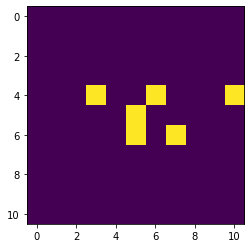

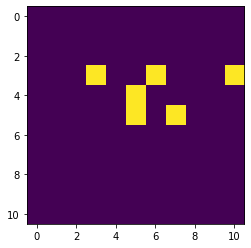

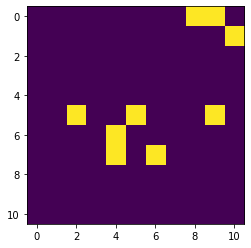

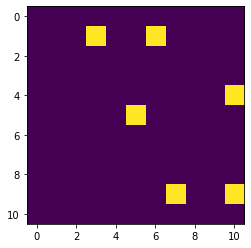

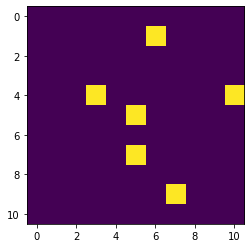

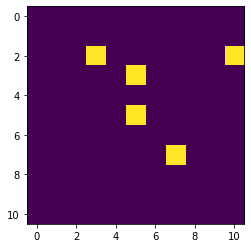

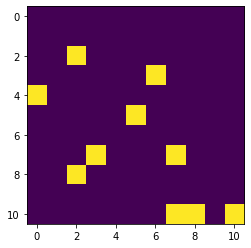

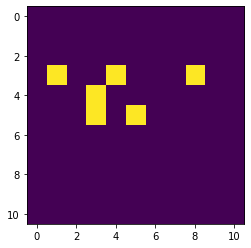

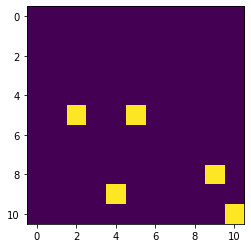

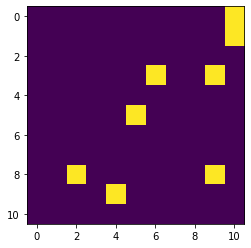

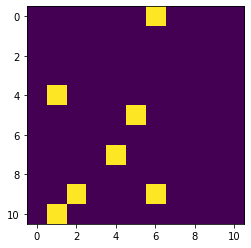

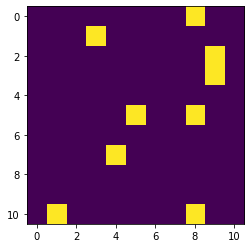

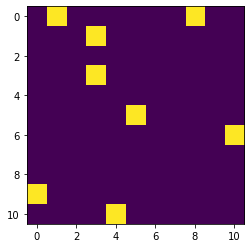

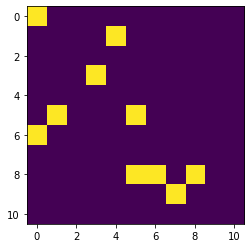

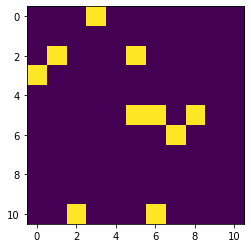

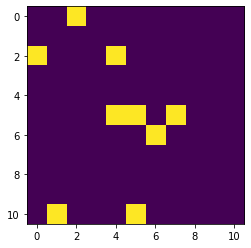

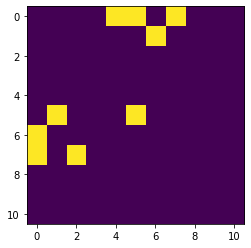

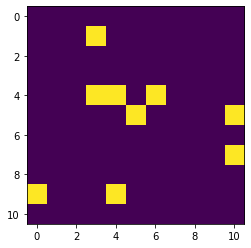

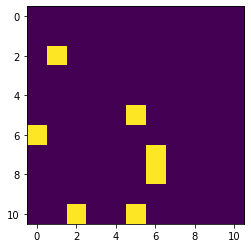

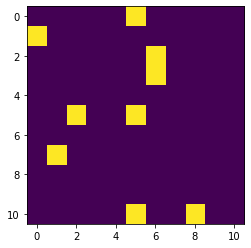

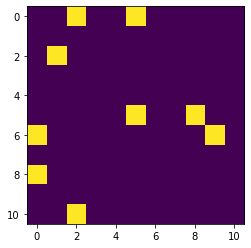

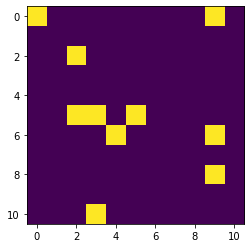

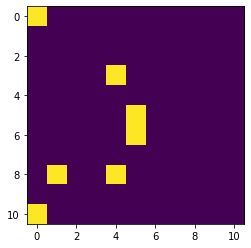

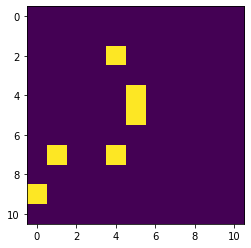

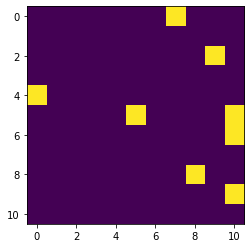

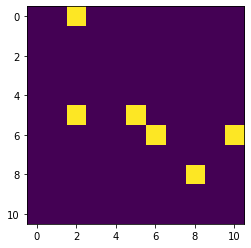

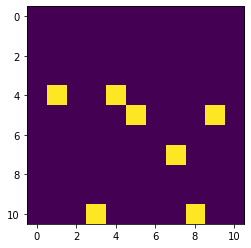

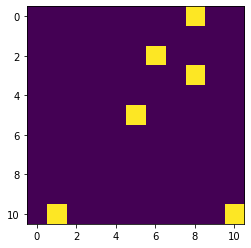

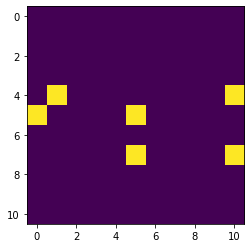

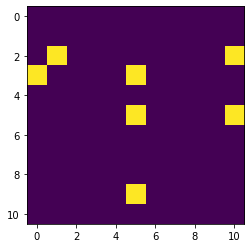

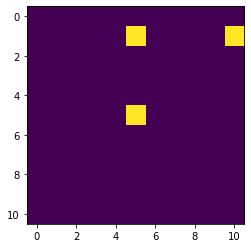

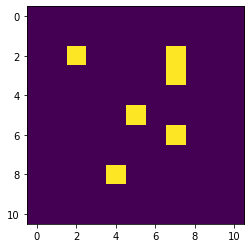

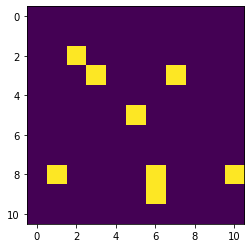

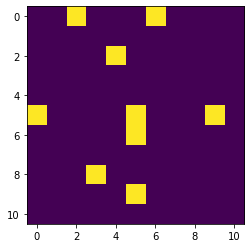

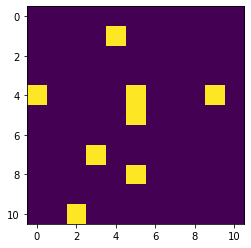

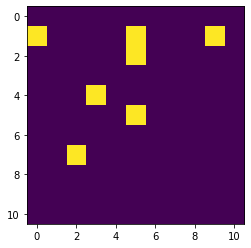

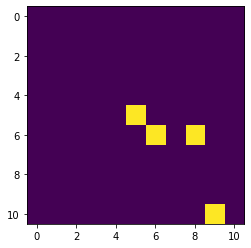

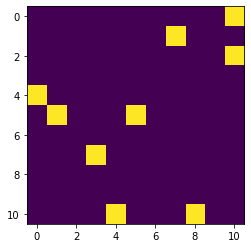

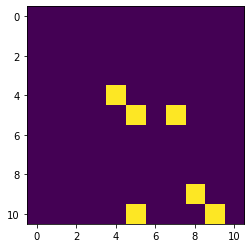

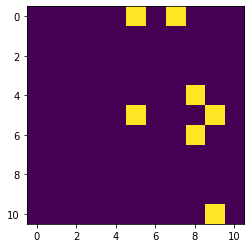

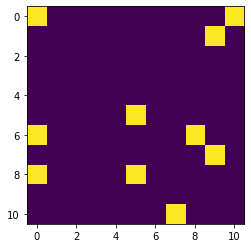

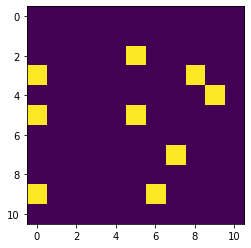

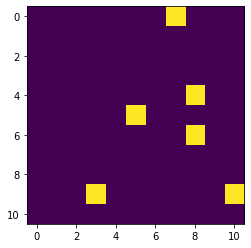

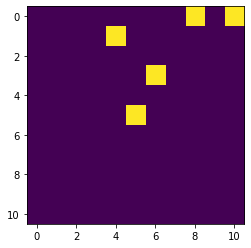

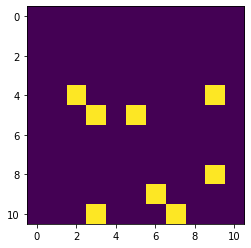

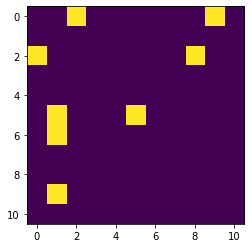

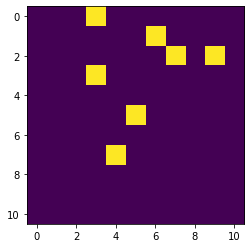

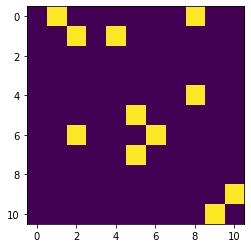

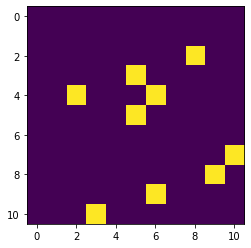

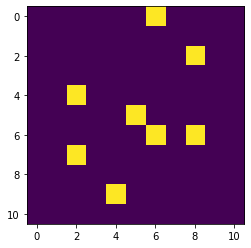

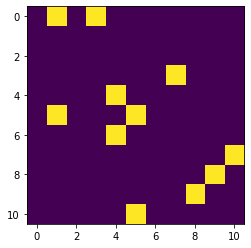

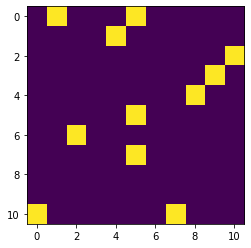

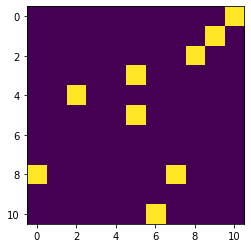

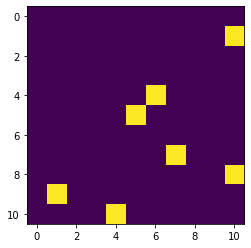

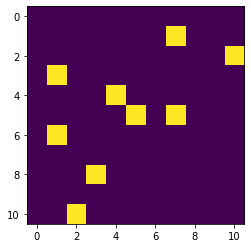

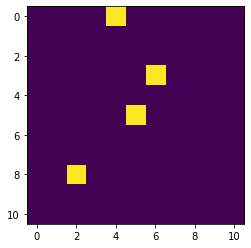

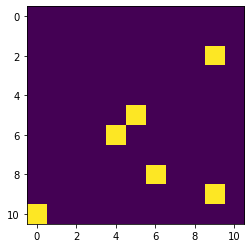

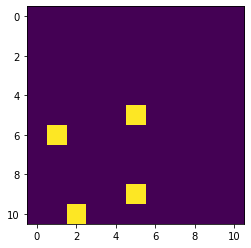

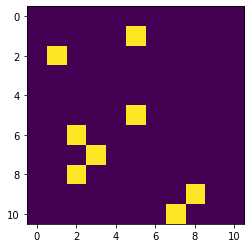

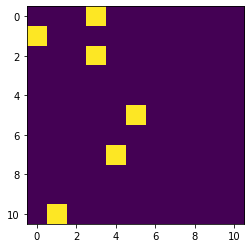

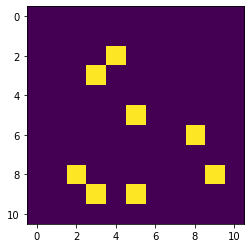

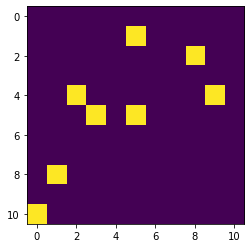

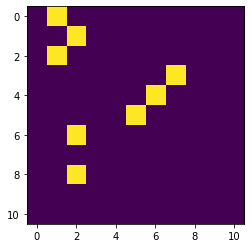

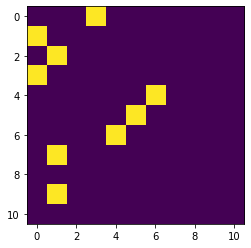

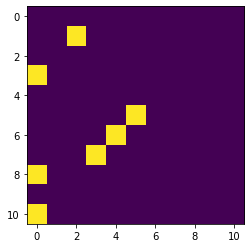

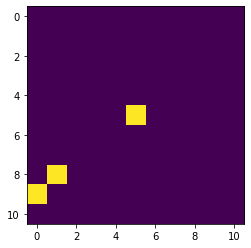

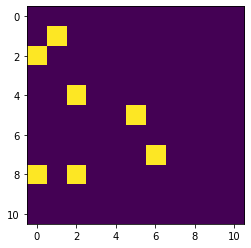

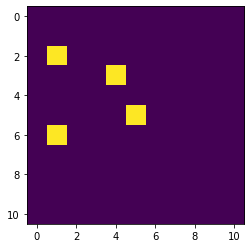

In [72]:
for locality in localities:
    plt.imshow(locality)
    plt.show()